View and download the data here: [Download](https://www.kaggle.com/c/rossmann-store-sales/data)

In [163]:
import pandas as pd

In [164]:
# Load the dataset
ross_df = pd.read_csv("train.csv")
store_df = pd.read_csv("store.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")


C:\Users\91916\anaconda3\envs\demo2\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
# preview of datasets
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [166]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [167]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [168]:
submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [169]:
# view dimension of datasets
ross_df.shape

(1017209, 9)

We can see that there are 1017209 rows and 9 feature in training datasets 

In [170]:
# view column names
ross_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Let's merge the information from `store_df` into `train_df` and `test_df`.

In [171]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')


In [172]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Exploratory Data Analysis

### Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [173]:
# view the summary of dataset
merged_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO


### Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [174]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    

In [175]:
split_date(merged_df)
split_date(merged_test_df)

In [176]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


### Store Open/Closed

Next, notice that the sales are zero whenever the store is closed.

In [177]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [178]:
merged_df = merged_df[merged_df.Open==1].copy()

### Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [179]:
def comp_month(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear + df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)
    

In [180]:
comp_month(merged_df)
comp_month(merged_test_df)

In [181]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,60.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,48.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,48.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,48.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,36.0


In [182]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen'],
      dtype='object')

Let's view the results of the new columns we've created.


In [183]:
merged_df[['Date','Year','Month','Day', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)


,Date,Year,Month,Day,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
515893,2014-03-26,2014,3,26,2003.0,8.0,72.0
833854,2013-06-14,2013,6,14,NaN,NaN,0.0
801140,2013-07-13,2013,7,13,NaN,NaN,0.0
651131,2013-11-25,2013,11,25,NaN,NaN,0.0
801589,2013-07-13,2013,7,13,NaN,NaN,0.0
7559,2015-07-25,2015,7,25,2009.0,4.0,108.0
747862,2013-08-30,2013,8,30,2011.0,9.0,12.0
915482,2013-04-02,2013,4,2,NaN,NaN,0.0
713206,2013-09-30,2013,9,30,NaN,NaN,0.0
94208,2015-05-08,2015,5,8,NaN,NaN,0.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [184]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']    
    

In [185]:
promo_cols(merged_df)
promo_cols(merged_test_df)

Let's view the results of the columns we've created.

In [186]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
559127,2014-02-15,0,NaN,NaN,NaN,0.000000,0
763456,2013-08-16,0,NaN,NaN,NaN,0.000000,0
715963,2013-09-28,1,2009.0,45.0,"Feb,May,Aug,Nov",46.622951,0
24164,2015-07-10,1,2011.0,14.0,"Jan,Apr,Jul,Oct",51.213115,1
844929,2013-06-04,1,2014.0,18.0,"Feb,May,Aug,Nov",0.000000,0
700201,2013-10-12,0,NaN,NaN,NaN,0.000000,0
382409,2014-07-28,0,NaN,NaN,NaN,0.000000,0
1013826,2013-01-04,1,2010.0,35.0,"Mar,Jun,Sept,Dec",28.196721,0
470348,2014-05-06,0,NaN,NaN,NaN,0.000000,0
210060,2015-01-24,0,NaN,NaN,NaN,0.000000,0


The features related to competition and promotion are now much more useful.

#### Declare feature vector and target variable

In [187]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [188]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [189]:
test_inputs = merged_test_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [190]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear','DayOfWeek'  ]
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']

In [191]:
inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   Promo                844392 non-null  int64  
 2   SchoolHoliday        844392 non-null  int64  
 3   CompetitionDistance  842206 non-null  float64
 4   CompetitionOpen      844392 non-null  float64
 5   Promo2               844392 non-null  int64  
 6   Promo2Open           844392 non-null  float64
 7   IsPromo2Month        844392 non-null  int64  
 8   Day                  844392 non-null  int64  
 9   Month                844392 non-null  int64  
 10  Year                 844392 non-null  int64  
 11  WeekOfYear           844392 non-null  UInt32 
 12  DayOfWeek            844392 non-null  int64  
dtypes: UInt32(1), float64(3), int64(9)
memory usage: 87.8 MB


In [192]:
inputs[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   StateHoliday  844392 non-null  object
 1   StoreType     844392 non-null  object
 2   Assortment    844392 non-null  object
dtypes: object(3)
memory usage: 25.8+ MB


### Impute missing numerical data

In [193]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
DayOfWeek                 0
dtype: int64

In [194]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
DayOfWeek               0
dtype: int64

In [195]:
inputs[categorical_cols].isna().sum()

StateHoliday    0
StoreType       0
Assortment      0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [196]:
max_distance = inputs.CompetitionDistance.max()

In [197]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [198]:
from sklearn.preprocessing import MinMaxScaler

In [199]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [200]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns



In [201]:
from sklearn.preprocessing import OneHotEncoder


In [202]:
categorical_cols

['StateHoliday', 'StoreType', 'Assortment']

In [203]:
#inputs['StateHoliday'].replace([0], 'unkown', inplace=True)

In [204]:
inputs['StateHoliday'].replace(['0',0], 'unkown', inplace=True)

In [214]:
test_inputs['StateHoliday'].replace(['0',0], 'unkown', inplace=True)


In [205]:
inputs['StateHoliday'].value_counts()

unkown    843482
a            694
b            145
c             71
Name: StateHoliday, dtype: int64

In [216]:
test_inputs['StateHoliday'].value_counts()

unkown    40908
a           180
Name: StateHoliday, dtype: int64

In [240]:
inputs[categorical_cols]

,StateHoliday,StoreType,Assortment
0,unkown,c,a
1,unkown,a,a
2,unkown,a,a
3,unkown,c,c
4,unkown,a,a
...,...,...,...
1016776,a,b,a
1016827,a,b,b
1016863,a,b,b
1017042,a,b,b


In [241]:
from sklearn.preprocessing import OneHotEncoder


In [247]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(inputs[categorical_cols])

OneHotEncoder(sparse=False)

In [248]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [249]:
encoded_cols

['StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StateHoliday_unkown',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [250]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [251]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [206]:
#inputs[categorical_cols]=inputs[categorical_cols].replace(['0', '0.0'], 'unkown', inplace=True)


In [213]:
# X_train = pd.concat([inputs[numeric_cols],
#                      pd.get_dummies(inputs.StateHoliday), 
#                      pd.get_dummies(inputs.StoreType),
#                      pd.get_dummies(inputs.Assortment)
#                      ], axis=1)

In [218]:
# X_test = pd.concat([test_inputs[numeric_cols],
#                      pd.get_dummies(test_inputs.StateHoliday), 
#                      pd.get_dummies(test_inputs.StoreType),
#                      pd.get_dummies(test_inputs.Assortment)
#                      ], axis=1)

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

# Training

In [225]:
from xgboost import XGBRegressor

In [226]:
?XGBRegressor

Init signature: XGBRegressor(*, objective='reg:squarederror', **kwargs)
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended

In [235]:
# model
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)


In [253]:
X.columns

Index(['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day',
       'Month', 'Year', 'WeekOfYear', 'DayOfWeek', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StateHoliday_unkown',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [254]:
# fit the model
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [258]:
pred = model.predict(X)

In [259]:
pred

array([8240.191 , 7753.0195, 8148.741 , ..., 6645.295 , 9080.025 ,
       9673.6455], dtype=float32)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [260]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [261]:
rmse(pred, targets)

2372.3761159179853

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [265]:
!pip install graphviz

In [269]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

In [270]:
trees = model.get_booster().get_dump()

In [273]:
len(trees)

20

In [274]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek<0.916666627] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek<0.0833333358] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[CompetitionDistance<0.002703059] yes=23,no=24,missing=23
				23:leaf=3347.80688
				24:leaf=2839.39551
			12:[Day<0.25] yes=25,no=26,missing=25
				25:leaf=3400.54419
				26:leaf=4059.85938
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[StoreType_b<0.5] yes=27,no=28,missing=27
				27:le

### Feature importance


In [277]:
important_df = pd.DataFrame({
    'feature': X.columns,
    'important':model.feature_importances_
}).sort_values('important',ascending=False)

In [280]:
important_df.head(10)

,feature,important
1,Promo,0.339040
18,StoreType_b,0.091878
5,Promo2,0.073687
12,DayOfWeek,0.057399
2,SchoolHoliday,0.053999
21,Assortment_a,0.052495
3,CompetitionDistance,0.045723
11,WeekOfYear,0.045332
0,Store,0.037221
8,Day,0.031108


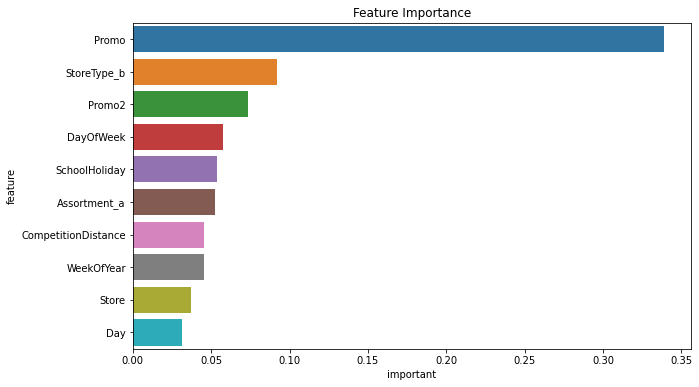

In [283]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=important_df.head(10), x='important', y='feature');

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation 

In [284]:
from sklearn.model_selection import KFold


Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [285]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [286]:
kfold = KFold(n_splits=5)


In [288]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2357.2053172754213, Validation RMSE: 2420.467420580379
Train RMSE: 2403.0701469857595, Validation RMSE: 2434.4600185128807
Train RMSE: 2361.476434364603, Validation RMSE: 2344.807216630491
Train RMSE: 2324.103178226812, Validation RMSE: 2442.7378754844603
Train RMSE: 2363.119527190367, Validation RMSE: 2431.0042865730256


Let's also define a function to average predictions from the 5 different models.

In [289]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [290]:
preds = predict_avg(models, X)


In [291]:
preds


array([7969.6274, 7453.0103, 8539.047 , ..., 7684.175 , 7820.961 ,
       9554.932 ], dtype=float32)

## Hyperparameter Tuning and Regularization

In [293]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Here's a helper function to test hyperparameters with K-fold cross validation.

In [294]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [296]:
from sklearn.model_selection import train_test_split


In [297]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)


In [298]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.


In [299]:
test_params(n_estimators=10)


Train RMSE: 2315.8474661294513, Validation RMSE: 2319.1498245945318


In [300]:
test_params(n_estimators=30)


Train RMSE: 1885.4238648423798, Validation RMSE: 1892.831247934045


In [301]:
test_params(n_estimators=100)


Train RMSE: 1176.3951651570762, Validation RMSE: 1188.761712953014


In [302]:
test_params(n_estimators=240)


Train RMSE: 891.2024934059983, Validation RMSE: 912.8053695800497


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [303]:
test_params(max_depth=2)


Train RMSE: 2351.417964943691, Validation RMSE: 2352.555429137367


In [304]:
test_params(max_depth=5)


Train RMSE: 1436.9799529752636, Validation RMSE: 1440.0601095610195


In [305]:
test_params(max_depth=10)


Train RMSE: 706.1976297415816, Validation RMSE: 796.5519275004139


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [306]:
test_params(n_estimators=50, learning_rate=0.01)


Train RMSE: 5043.356901737129, Validation RMSE: 5052.433255617137


In [307]:
test_params(n_estimators=50, learning_rate=0.1)


Train RMSE: 2190.0229774072113, Validation RMSE: 2194.754257703


In [308]:
test_params(n_estimators=50, learning_rate=0.3)


Train RMSE: 1547.6685256292346, Validation RMSE: 1553.9867068704561


In [309]:
test_params(n_estimators=50, learning_rate=0.9)


Train RMSE: 1118.658905104877, Validation RMSE: 1137.8066458731853


In [310]:
test_params(n_estimators=50, learning_rate=0.99)


Train RMSE: 1146.6576863825705, Validation RMSE: 1164.4793772014555


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [311]:
test_params(booster='gblinear')


Train RMSE: 2754.407960506952, Validation RMSE: 2759.156351819453


## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [312]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [313]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
test_preds = model.predict(X_test)


In [317]:
test_preds

array([ 3780.8516,  7803.4673,  9163.91  , ...,  6509.141 , 24578.879 ,
        6790.905 ], dtype=float32)

In [315]:
submission_df['Sales']  = test_preds


In [318]:
submission_df.head(10)

,Id,Sales
0,1,3780.851562
1,2,7803.467285
2,3,9163.910156
3,4,7374.697266
4,5,6789.161133
5,6,5700.356445
6,7,7728.006348
7,8,8068.270996
8,9,5384.387207
9,10,5874.729980


if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [319]:
test_df.Open.isna().sum()


11

In [320]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)


In [323]:
submission_df


,Id,Sales
0,1,3780.851562
1,2,7803.467285
2,3,9163.910156
3,4,7374.697266
4,5,6789.161133
...,...,...
41083,41084,2538.316162
41084,41085,7404.054199
41085,41086,6509.141113
41086,41087,24578.878906


In [325]:
submission_df.to_csv('submission.csv', index=None)